# PHY321 Midterm 2024

Welcome to the midterm and good luck!  This is an open-book, open-sourced midterm, so you may use resources such as class notes, lab solutions, and the internet.  However - your work should be your own.  Please send any questions to tracy.webb@mcgill.ca.

The exam is due Thursday Feb 22 at 11:30 am (right before the next lab). As usual, please push your final files to Github. 

Some parts of this lab require coding and others require you to write out an answer.  In the latter case, you can include your answer here or in a separate PDF.

## Question 1

Allison is an observational astronomer who studies galaxy clusters.  She has been granted time to image some clusters on one of the two 6.5m twin Magellan telescopes at Las Campanas Observatory in Chile, on September 24, 2024.  She has three galaxy clusters she is particularly interested in and wants to use the evening efficiently. Given the coordinates of the clusters below determine (a) how long each cluster is visible for and (b) in what order she should observe them. To do this you may assume that she can start observing as soon as the Sun is below the horizon and must stop as soon as it rises.  Illustrate your answer using one or more plots.

Cluster 1:  00:34:03.4809 -42:59:02.687  $z = 0.5$

Cluster 2:  03:33:57.4631 -29:30:13.609  $z = 1.0$

Cluster 3:  02:24:24.6536 -02:57:58.89   $z = 1.5$

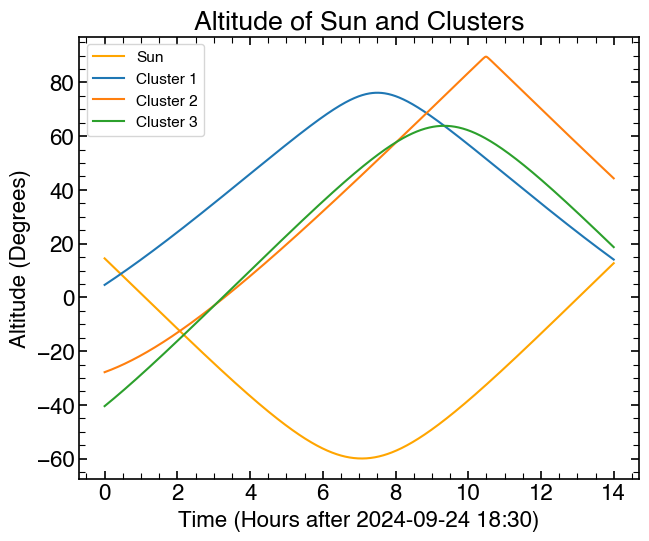

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import astropy.coordinates
from astropy.coordinates import EarthLocation, AltAz, FK5, get_sun
from astropy.coordinates import SkyCoord
from astropy.time import Time
LasCampanas=EarthLocation.of_site('Las Campanas Observatory')
observing_time = Time('2024-09-24 21:30') #18:30 in Las Campanas is 21:30 UTC
deltaT=1/60*u.hour
observinghours=14
deltatimes=np.arange(0, observinghours*60+1, 1)*deltaT
times=deltatimes+observing_time
ref_frame=AltAz(location=LasCampanas,obstime=times)
Sun_alts=get_sun(times).transform_to(ref_frame).alt
cluster1=SkyCoord(ra='00h34m03.4809s', dec='-42d59m02.687s')
cluster1_alts=cluster1.transform_to(ref_frame).alt
cluster2=SkyCoord(ra='03h33m57.4631s', dec='-29d30m13.609s')
cluster2_alts=cluster2.transform_to(ref_frame).alt
cluster3=SkyCoord(ra='02h24m24.6536s', dec='-02d57m58.89s')
cluster3_alts=cluster3.transform_to(ref_frame).alt

plt.plot(deltatimes,Sun_alts,color='orange',label='Sun')
plt.plot(deltatimes,cluster1_alts,label='Cluster 1')
plt.plot(deltatimes,cluster2_alts,label='Cluster 2')
plt.plot(deltatimes,cluster3_alts,label='Cluster 3')
plt.xlabel('Time (Hours after 2024-09-24 18:30)')
plt.ylabel('Altitude (Degrees)')
plt.title('Altitude of Sun and Clusters')
plt.legend()
plt.show()

From this plot we can see that only Cluster 1 is above the horrizon at sunset and all three clusters remain above the horrizon until after sunrise. Cluster 1 is visible from sunset to sunrise and clusters 2 and 3 are visible from when they rise until sunrise.

In [189]:
def risetime(times, alts):
    for i in range(1,len(alts)):
        if (alts[i]>=0 and alts[i-1]<0):
            return times[i]
def settime(times, alts):
    for i in range(1,len(alts)):
        if (alts[i]<=0 and alts[i-1]>0):
            return times[i]

visible_time_1=risetime(deltatimes,Sun_alts)-settime(deltatimes,Sun_alts)
visible_time_2=risetime(deltatimes,Sun_alts)-risetime(deltatimes,cluster2_alts)
visible_time_3=risetime(deltatimes,Sun_alts)-risetime(deltatimes,cluster3_alts)

print('Cluster 1 is visible for '+str(visible_time_1))
print('Cluster 2 is visible for '+str(visible_time_2))
print('Cluster 3 is visible for '+str(visible_time_3))

Cluster 1 is visible for 11.916666666666666 h
Cluster 2 is visible for 9.733333333333334 h
Cluster 3 is visible for 9.783333333333333 h


Cluster 1 should be observed first since it is above the horrizon when the other two still have not risen. Then Cluster 3 should be observed since it rises before Cluster 2. Finally, Cluster 2 should be observed.

The above list also contains the redshifts of the clusters.
_c)_  How old was the universe when their light (that we detect today) left each of them? And how big was the universe compared to today?

In [190]:
from astropy.cosmology import Planck15
age1=Planck15.age(0.5)
a1=1/(1+0.5)

age2=Planck15.age(1.0)
a2=1/(1+1.0)

age3=Planck15.age(1.5)
a3=1/(1+1.5)

print(f'The Universe was {age1} old when the light from Cluster 1 was emitted and {a1} times the size as today.')
print(f'The Universe was {age2} old when the light from Cluster 2 was emitted and {a2} times the size as today.')
print(f'The Universe was {age3} old when the light from Cluster 3 was emitted and {a3} times the size as today.')

The Universe was 8.603920728495112 Gyr old when the light from Cluster 1 was emitted and 0.6666666666666666 times the size as today.
The Universe was 5.862549255024051 Gyr old when the light from Cluster 2 was emitted and 0.5 times the size as today.
The Universe was 4.277756898051284 Gyr old when the light from Cluster 3 was emitted and 0.4 times the size as today.


## Question 2

The following image is a simplified Hertzsprung-Russell diagram for a star cluster. 

<div>
<img src="HR_filled.png" width="400">
</div>

Where b and r correspond to the blue ($300\,\textrm{nm} \lesssim \lambda \lesssim 650\,\textrm{nm}$) and red ($650\,\textrm{nm} \lesssim \lambda \lesssim 1000\,\textrm{nm}$), while G covers both these ranges.  

a) Star A (in the cluster) has a colour of $b-r = 4$ and star B (also in the cluster) has a colour of $b-r = 1$. What is the ratio of their luminosities?

From the graph, the absolute G magnitude corresponding to the b-r magnitude for Star A (4) is 11. The absolute G magnitude corresponding to the b-r magnitude for Star B (1) is 5. Using the formula m1-m2=-2.5log(F1/F2). Using the fact that absolute magnitude represents the magnitude of an object viewed from exactly 10 parsecs away, L1=4pi*(10pc)^2*F1 and L2=4pi*(10pc)^2*F2, so m1-m2=-2.5log((L1/(4pi(10pc)^2))/(L2/(4pi(10pc)^2)))=-2.5log(L1/L2). \
mA-mB=11-5=6=-2.5log(LA/LB) \
-2.4=log(LA/LB) \
10^-2.4=LA/LB. \
LA/LB=0.00398 
## Your answer here.

b) Star C is a main sequence star with a colour of $b-r = 1$ that is observed in a second cluster and has an apparent G-magnitude of 12. How far away is star C?

Like Star B, Star C has b-r magnitude 1, which corresponds to an absolute G magnitude of 5. We can use the formula m-M=5log(d/10pc). \
12-5=7=5log(d/10pc) \
1.4=log(d/10pc) \
10^1.4=d/10pc \
d=10^1.4*10pc \
d=251pc

## Your answer here.

## Question 3

The image below illustrates the exquisite depth of the James Webb Space Telescope (JWST).  Left is a mid-infrared (MIR) image with the instrument MIRI and the right shows a near-infrared (NIR) image taken with NIRCam.  

<div>
<img src="STScI-01G7DDFWDZG05PEZV7FBBHMH0J.png" width="400">
</div>

_a)_ The approximate $\it limiting$ $\it depth$ of JWST in the NIR is +34 magnitudes.  This means that this is the faintest magnitude that JWST can detect, in roughly 1 hour.   Plot the minimum luminosity of a galaxy that can be detected by JWST (in 1 hour)  as a function of redshift, expressed in terms of solar luminosities. 

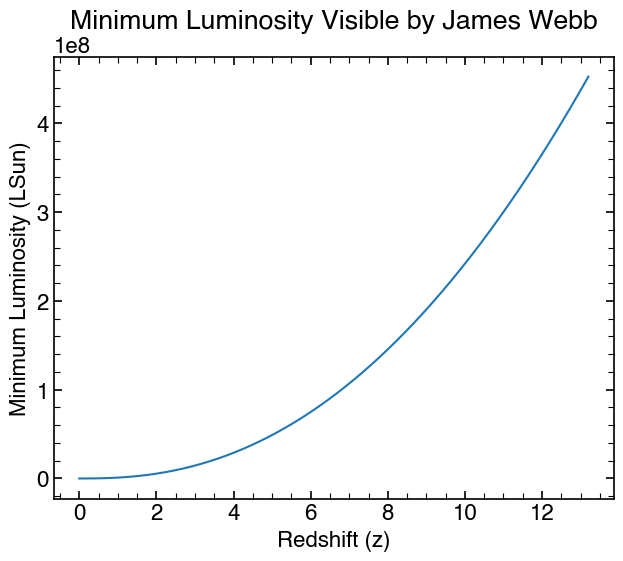

In [191]:
zs=np.linspace(0,13.2,1000)
m=34
d_lum=Planck15.luminosity_distance(zs)
M=m-5*np.log10(d_lum/((10*u.pc)))
MSun=4.83
#M-MSun=-2.5*np.log10(F/FSun) 
#F=L/4*pi*(10pc)^2, FSun=(LSun/4*pi*(10pc)^2), so F/FSun=L/LSun
#M-MSun=-2.5*log10(L/LSun) 
#LSun is defined as 1
#M-MSun=-2.5*log10(L)
#log10(L)=(MSun-M)/2.5
L=10**((MSun-M)/2.5)
plt.plot(zs,L)
plt.xlabel('Redshift (z)')
plt.ylabel('Minimum Luminosity (LSun)')
plt.title('Minimum Luminosity Visible by James Webb')
plt.show()

__b)__ Suppose we lived in a (fake) universe that contained only three types of galaxies, each of which have an exact well-defined luminosity:
* Type A galaxies that have luminosity $L = 10^{8}L_\odot$. These galaxies have a number density of $10^{-2}$ per comoving Mpc$^{3}$.
* Type B galaxies that have luminosity $L = 10^{10}L_\odot$. These galaxies have a number density of $5 \times 10^{-2}$ per comoving Mpc$^{3}$.
* Type C galaxies that have luminosity $L = 10^{12}L_\odot$. These galaxies have a number density of $10^{-3}$ per comoving Mpc$^{3}$.

Now imagine (completely unrealistically) that we get to use JWST to perform a galaxy survey over the entire sky. How many of each galaxy type should I expect to find?

In [192]:
# At very high redshifts, the Universe wasn't forming galaxies yet,
# so we will take the largest redshift that has galaxies to be the redshift of the farthest
# galaxy discovered by James Webb, JADES-GS-z13-0 at z=13.2.

def find_max_z(luminosity):
    for i in range(len(zs)):
        if L[i]>=luminosity:
            return zs[i]



#For Type A galaxies, 
L_A=10**8 #(Solar Luminosities)
z_max_A=find_max_z(L_A)
print('z_max_A= ' + str(z_max_A))
#The calculated maximum z for the galaxy to be visible is 6.80, which is smaller than the limit of 13.2, so we use it as the maximum redshift visible.
R_A=Planck15.comoving_distance(z_max_A)
V_A=4/3*np.pi*R_A**3 #whole sky
#N_A=n_A*V_A, where n_A is number density of Type A galaxies and N_A is the number of Type A galaxies to be found
n_A=10**-2 * (u.Mpc**(-3))
N_A=n_A*V_A
print(f'We expect to find {N_A/10**9} billion Type A galaxies.')

#For Type B galaxies, 
L_B=10**12 #(Solar Luminosities)
z_max_B=find_max_z(L_B)
# No maximum redshift in the range 0<z<13.2 was found. This means galaxies of Type B are visible up to the limit of z=13.2.
print('z_max_B= ' + str(z_max_B)+' in the range 0<z<13.2; setting to 13.2')
z_max_B=13.2
R_B=Planck15.comoving_distance(z_max_B)
V_B=4/3*np.pi*R_B**3 #whole sky
#N_B=n_B*V_B, where n_B is number density of Type B galaxies and N_B is the number of Type B galaxies to be found
n_B=5*10**-2 * (u.Mpc**(-3))
N_B=n_B*V_B
print(f'We expect to find {N_B/10**9} billion Type B galaxies.')

#For Type C galaxies, 
L_C=10**10 #(Solar Luminosities)
z_max_C=find_max_z(L_C)
# No maximum redshift in the range 0<z<13.2 was found. This means galaxies of Type C are visible up to the limit of z=13.2.
print('z_max_C= ' + str(z_max_C)+' in the range 0<z<13.2; setting to 13.2')
z_max_C=13.2
R_C=Planck15.comoving_distance(z_max_C)
V_C=4/3*np.pi*R_C**3 #whole sky
#N_C=n_C*V_C, where n_C is number density of Type C galaxies and N_C is the number of Type C galaxies to be found
n_C=10**-3 * (u.Mpc**(-3))
N_C=n_C*V_C
print(f'We expect to find {N_C/10**9} billion Type C galaxies.')

z_max_A= 6.804804804804804
We expect to find 28.08813641923143 billion Type A galaxies.
z_max_B= None in the range 0<z<13.2; setting to 13.2
We expect to find 223.7901469514353 billion Type B galaxies.
z_max_C= None in the range 0<z<13.2; setting to 13.2
We expect to find 4.475802939028706 billion Type C galaxies.


## Question 4

The probability distribution for the speed $v$ of a particle in an ideal gas is given by the _Maxwell-Boltzmann_ distribution:

\begin{equation}
4 \pi \left(\frac{m}{2 \pi k_b T} \right)^{3/2}  v^2 \exp \left( \frac{-mv^2}{2 k_b T} \right),
\end{equation}

where $k_b$ is Boltzmann's constant, $m$ is the mass of an atom in the gas, and $T$ is the temperature.

_a)_ Suppose we have an ideal gas in the lab. Let's assume that we know what type of gas we have, so the mass is known. To simplify matters, work in units where $m / k_b = 1$. You go into the lab and you make _one_ measurement of velocity (i.e., you measure the speed of _one_ atom). You get $v = 20$ (in our weird units).

What can you infer about $T$, the temperature of the gas from this one measurement?

Bayes Theorem: p(T|v)=p(v|T)*p(T)/p(v)
The 1/p(v) normalization (evidence) term is handled by ensuring that the Posterior p(T|v) is normalized, so
p(T|v)~p(v|T)*p(T)

Using m/kb=1,
p(v|T)=4pi*(2piT)^(-3/2)*v^2*exp(-v^2/(2T))
With the measurement v=20,
p(v|T)=4pi*(2piT)^(-3/2)*20^2*exp(-20^2/(2T))

Since we do not know anything aboout the temperature of the gas before the measurement,
we will assume the gas is equally likely to have any temperature between 1 K and 1,001 K
(0 K caused divide by zero errors and a gas would be very unlikely to have such low temperature anyways) 
Choosing a flat prior between T=1 K and T=1,001 K,
p(T)=1/(1,001-1)=1/1,000=0.001

p(T|v)~4pi*(2piT)^(-3/2)*20^2*exp(-20^2/(2T))*0.001 

Text(0, 0.5, 'P(Temperature)')

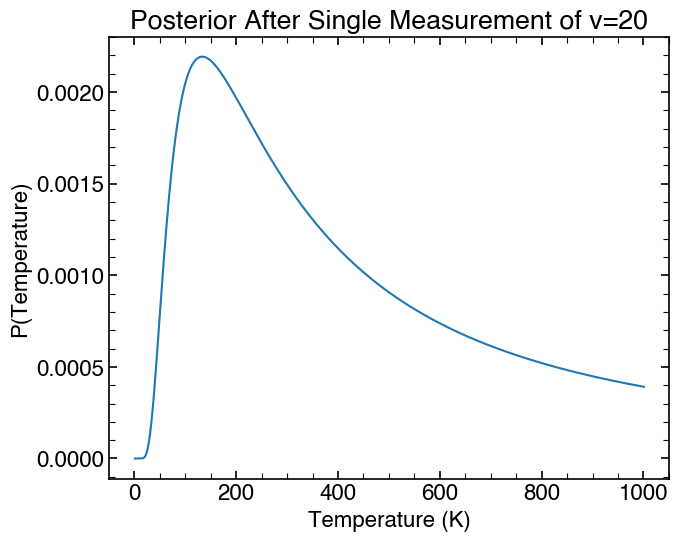

In [193]:
Ts=np.arange(1,1002,1)
posterior_unnormalized=4*np.pi*(2*np.pi*Ts)**(-3/2)*20**2*np.e**(-20**2/(2*Ts))*0.001
Integral=np.trapz(posterior_unnormalized, x=Ts)
posterior=posterior_unnormalized/Integral
plt.plot(Ts,posterior)
plt.title('Posterior After Single Measurement of v=20')
plt.xlabel('Temperature (K)')
plt.ylabel('P(Temperature)')

To infer a value for T, we will choose the temperature that represents the median of the posterior probability density function. This will require calculating the Temperature T_median such that the Integral from 1 (p(T)=0 for T<1) to T_median of the probability density function is 0.5.

In [194]:
def get_percentile(percentile, dx=1):
    crit=percentile/100
    A=0
    for i in range(1,len(Ts)):
        A+=(posterior[i]+posterior[i-1])/2*dx #trapizoidal approximation for integration
        if A>=crit:
            return Ts[i]
median=get_percentile(50)
print(f'The infered value for T is {median} K.')

The infered value for T is 321 K.


_b)_ What is the 95\% credibility region for your inferred $T$?

## Your answer here. 

The 95% confidence interval lies between the percentiles 2.5 and 97.5, since 97.5-2.5=95, meaning we are 95% confident that the true value of T lies within this interval.

In [195]:
upper_limit=get_percentile(97.5)
lower_limit=get_percentile(2.5)
print(f'The 95 percent confidence interval is [{lower_limit} K,{upper_limit} K].')

The 95 percent confidence interval is [66 K,940 K].


_c)_ You take a few more measurements: $v=(30, 28.5, 18, 15, 20, 20)$. Update your knowledge of $T$, stating your assumptions.

Infered value for T (median): 189 K
The 95 percent confidence interval is [106 K,389 K].


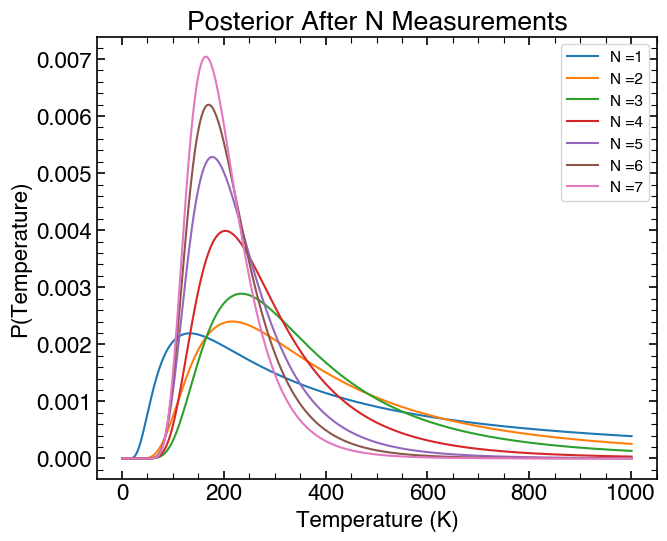

In [196]:
#It is assumed that the posterior for the initial measurement of v=20 is the prior for the other six measurements.
#Each measurement is added separately, with the last posterior being the prior and the likelihood being given by the
#Maxwell-Boltzmann Distribution for the added temperature. It is also assumed that the temperature of the gas is between 1K and 1,001K.

vs=[30,28.5,18,15,20,20]
posteriors=[posterior]
for v in vs:
    prior=posterior
    likelihood=4*np.pi*(2*np.pi*Ts)**(-3/2)*v**2*np.e**(-v**2/(2*Ts))
    posterior_unnormalized=likelihood*prior
    Integral=np.trapz(posterior_unnormalized, x=Ts)
    posterior=posterior_unnormalized/Integral
    posteriors.append(posterior)
    #plt.plot(Ts,posterior)
for i in range(len(posteriors)):
    plt.plot(Ts,posteriors[i],label=f'N ={i+1}')
    plt.xlabel('Temperature (K)')
    plt.ylabel('P(Temperature)')
    plt.legend()
    plt.title('Posterior After N Measurements')
#Use the last posterior to calculate new median and confidence interval.
posterior=posteriors[-1]
upper_limit=get_percentile(97.5)
median=get_percentile(50)
lower_limit=get_percentile(2.5)  
print('Infered value for T (median): '+str(median) +' K')
print(f'The 95 percent confidence interval is [{lower_limit} K,{upper_limit} K].')